# Simulação de um sistema de EDO

Os modelos matemáticos representam uma aproximação de mundo do real. No caso de processos químicos, eles podem auxiliar em diversas tarefas do engenheiro, como projetar equipamentos, determinar a condição operacional ótima, analisar o comportamento dinâmico e propor estratégias de controle. Para isso, uma etapa fundamental é a simulação dos modelos com o auxílio do computador.

Dada a diversidade da natureza matemática dos modelos, existem muitas técnicas numéricas para a resolução das equações. Aqui, será considerada apenas a integração numérica de um sistema de equações diferenciais ordinárias (EDO) de primeira ordem, em que a variável independente é o tempo:

$$ \frac{dx}{dt}=f(t,x,u)$$
$$ x(t_0 )=x_0 $$

em que $f( )$ representa um sistema de equações; $t$, a variável independente tempo;
 $x$, o vetor de variáveis dependentes ou de estado com a condição inicial $x_0$ em $t=t_0$; e $u$, o vetor de variáveis de entrada.

Muitos problemas dinâmicos podem ser representados por este tipo de equação, como aqueles que envolvem tanques de mistura e reatores (batelada e tipo tanque agitado). De qualquer forma, equações de ordem superior podem ser reescritas na forma acima e sistemas de equações diferenciais parciais (EDP) podem ser transformados em um sistema de EDO, por exemplo, aplicando-se diferenças finitas.

A solução deste tipo de problema no Python, pode ser feita em duas partes:

* A primeira é a implementação de uma função com as equações $f(t,x,u)$, que aceita a variável independente, as variáveis dependentes e quaisquer parâmetros necessários e retorna os valores das derivadas $dx/dt$ das variáveis dependentes.
* A segunda parte integra a função com o integrador solve_ivp da biblioteca SciPy (scipy.integrate) para calcular soluções das variáveis dependentes em um intervalo de tempo especificado, assumindo as condições iniciais fornecidas.

Assim, a partir da condição inicial $x(t_0 )=x_0$, é possível conhecer o comportamento dinâmico das variáveis de estado $x(t), ∀ t>t_0$, considerando diferentes valores para a variáveis de entrada. É possível conhecer o perfil de resposta, a iteração entres a variáveis, o estado estacionário, sensibilidade das variáveis, o grau de não linearidade, entre outros.

# Exemplo de aplicação

Considere o problema de um processo químico dado por um reator CSTR não adiabático encamisado, onde ocorre a reação $A → B$ de 1ª ordem (Seborg et al., 2011). Há 2 variáveis de estado: a concentração de reagente ($c_A$) e a temperatura do reator ($T$). As variáveis de entrada são: a vazão e concentração de alimentação de reagente ($q$ e $c_{Ai}$), mais a temperatura do refrigerante ($T_C$).


<img src='exemplo_reator_seborg.png' width="400" height="400">


Modelo dinâmico
$$ V \frac{dc_A}{dt} = q(c_{Ai}-c_A )-Vkc_A$$
$$ Vρc_P \frac{dT}{dt} = qρc_P (T_i-T)+(-\Delta H_R )Vkc_A-UA(T-T_C )$$
$$ k=k_0 e^{-E/RT} $$

A entrada está a temperatura $T_i$; e a corrente de produto flui a vazão $q$, com concentração $c_A$ e temperatura $T$. Os demais parâmetros do problema constantes são: volume $V$, calor específico ($c_P$), densidade ($\rho$), entalpia $\Delta H_R$, e coeficiente de troca térmica $UA$.

Os valores dos parâmetros e condição inicial das variáveis podem vistos abaixo.

* Parâmetros e condições nominais operacionais para o CSTR (Seborg et al., 2011).

|Parâmetro|Valor <img width=50/>|Parâmetro|Valor<img width=100/>|Variáveis|Valor<img width=50/>|
|:--|:--|:--|:--|:--|:--|
|$V$|$100 L$|$-\Delta H_R$|$5\times10^4 J/mol$|$c_A(0)$|$0.5 mol/L$|
|$\rho$|$1000 g/L$|$k_0$|$7.2\times 10^{10} min^{-1}$|$T(0)$|$350 K$|
|$c_P$|$0.239 J/{gK}$|$E$|$72747.5 J/mol$|$q(0)$|$100 L/min$|
|$T_i$|$350 K$|$R$|$8.314 J/(molK)$|$c_{Ai}$|$1.0 mol/L$|
|$-$|$-$|$UA$|$5\times 10^2 J/(minK)$|$T_C$|$300 K$|





Implemente o modelo no Python. Faça algumas simulações variando as condições operacionais das variáveis de entrada, usando testes do tipo T_C+10K e T_C-10K. Verifique os resultados em saídas gráficas, como a mostrada aqui abaixo.

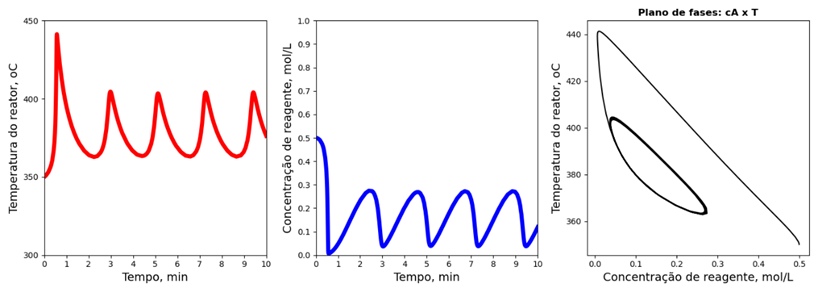

# Implementação no Python

## 1.	Importação de bibliotecas e definição do modelo do processo

## 2.	Integração do modelo usando a função solve_ivp

## 3.	Geração das saídas gráficas